# Polynomial Regression King County, WA Housing Data

In [32]:
#Import Libaries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, max_error
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures


King County Data Import

In [3]:
sales = pd.read_csv('C:/Users/arutherford/Documents/Python Scripts/ML_UW_Coursera_1/Datasets/kc_house_data.csv')


In [4]:
sales.columns


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
sales.head()


id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

Create a working copy

In [6]:
sales_df = sales

King County Housing Dataset

* id :a notation for a house
* date: Date house was sold
* price: Price is prediction target
* bedrooms: Number of Bedrooms/House
* bathrooms: Number of bathrooms/bedrooms
* sqft_living: square footage of the home
* sqft_lot: square footage of the lot
* floors :Total floors (levels) in house
* waterfront :House which has a view to a waterfront
* view: Has been viewed
* condition :How good the condition is Overall
* grade: overall grade given to the housing unit, based on King County grading system
* sqft_above :square footage of house apart from basement
* sqft_basement: square footage of the basement
* yr_built :Built Year
* yr_renovated :Year when house was renovated
* zipcode:zip code
* lat: Latitude coordinate
* long: Longitude coordinate
* sqft_living15 :Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
* sqft_lot15 :lotSize area in 2015(implies-- some renovations)


Datatypes

In [7]:
sales_df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

There may be some issues with the date so its dropped

In [8]:
sales_df.drop('date', axis=1, inplace=True)

In [9]:
sales_df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [10]:
sales_df.head()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520  221900.0         3       1.00         1180      5650     1.0   
1  6414100192  538000.0         3       2.25         2570      7242     2.0   
2  5631500400  180000.0         2       1.00          770     10000     1.0   
3  2487200875  604000.0         4       3.00         1960      5000     1.0   
4  1954400510  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
1           0     0          3      7        2170            400      1951   
2           0     0          3      6         770              0      1933   
3           0     0          5      7        1050            910      1965   
4           0     0          3      8        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1          1991    98125  47.7210 -122.319           1690        7639  
2             0    98028  47.7379 -122.233           2720        8062  
3             0    98136  47.5208 -122.393           1360        5000  
4             0    98074  47.6168 -122.045           1800        7503

Data exploration

Absolute value of the Pearson's Correlation Coefficient

<Axes: >

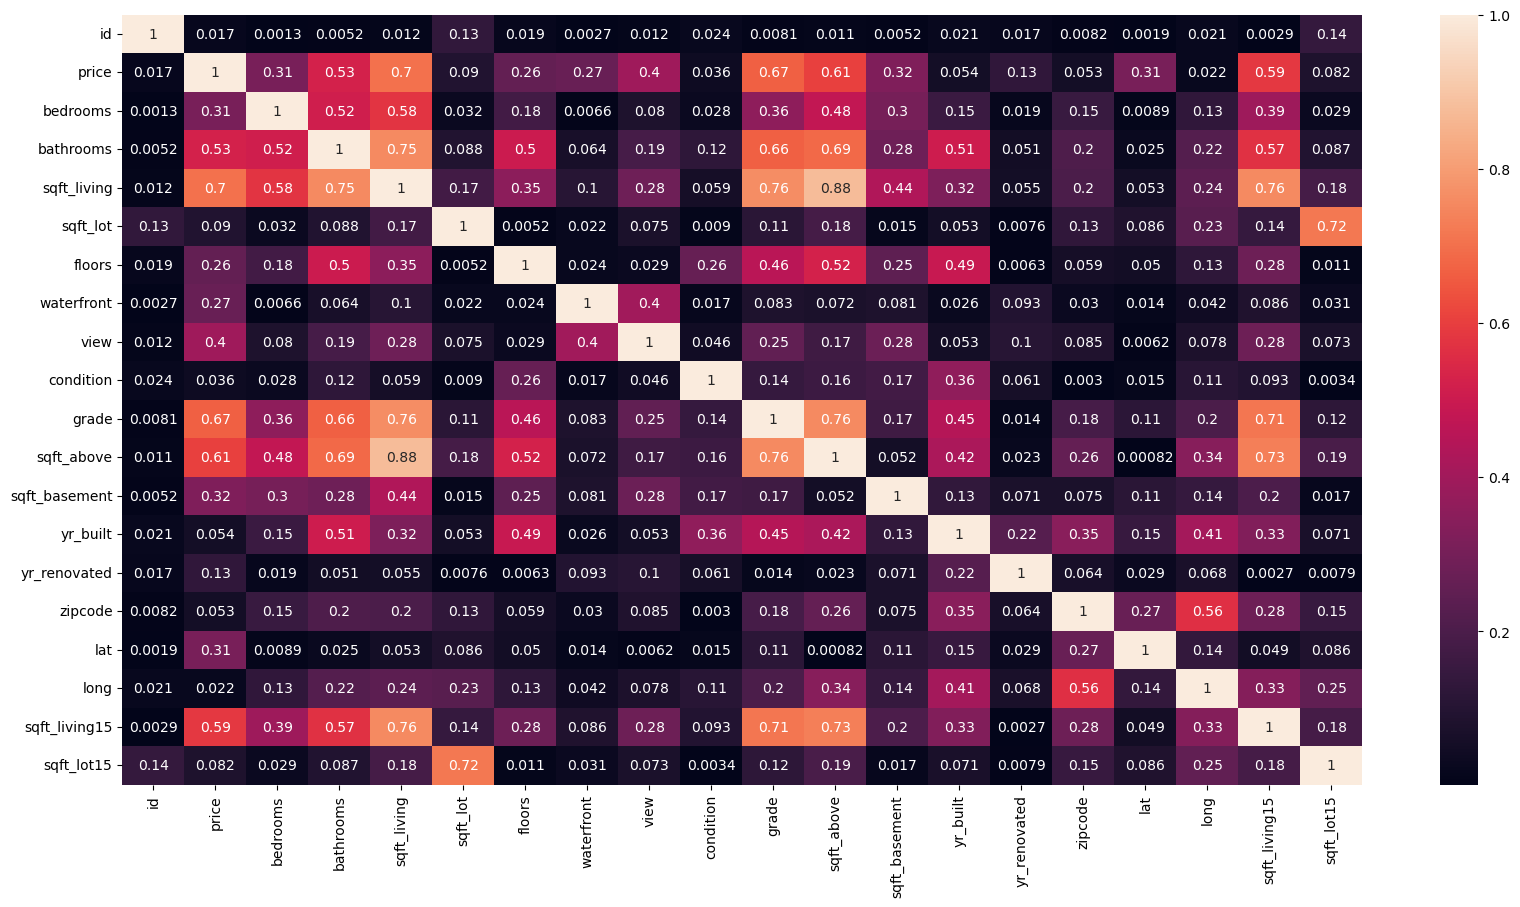

In [11]:
plt.figure(figsize = (20, 10))
sns.heatmap(sales_df.corr().abs(), annot = True)


Identifying those with potential for high colinearity (ie above 0.7)

In [12]:
sales_df.drop(columns = ["sqft_lot15", "sqft_living15", 'zipcode'], inplace = True)

Pairplot to take a look at the samples

C:\Users\arutherford\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


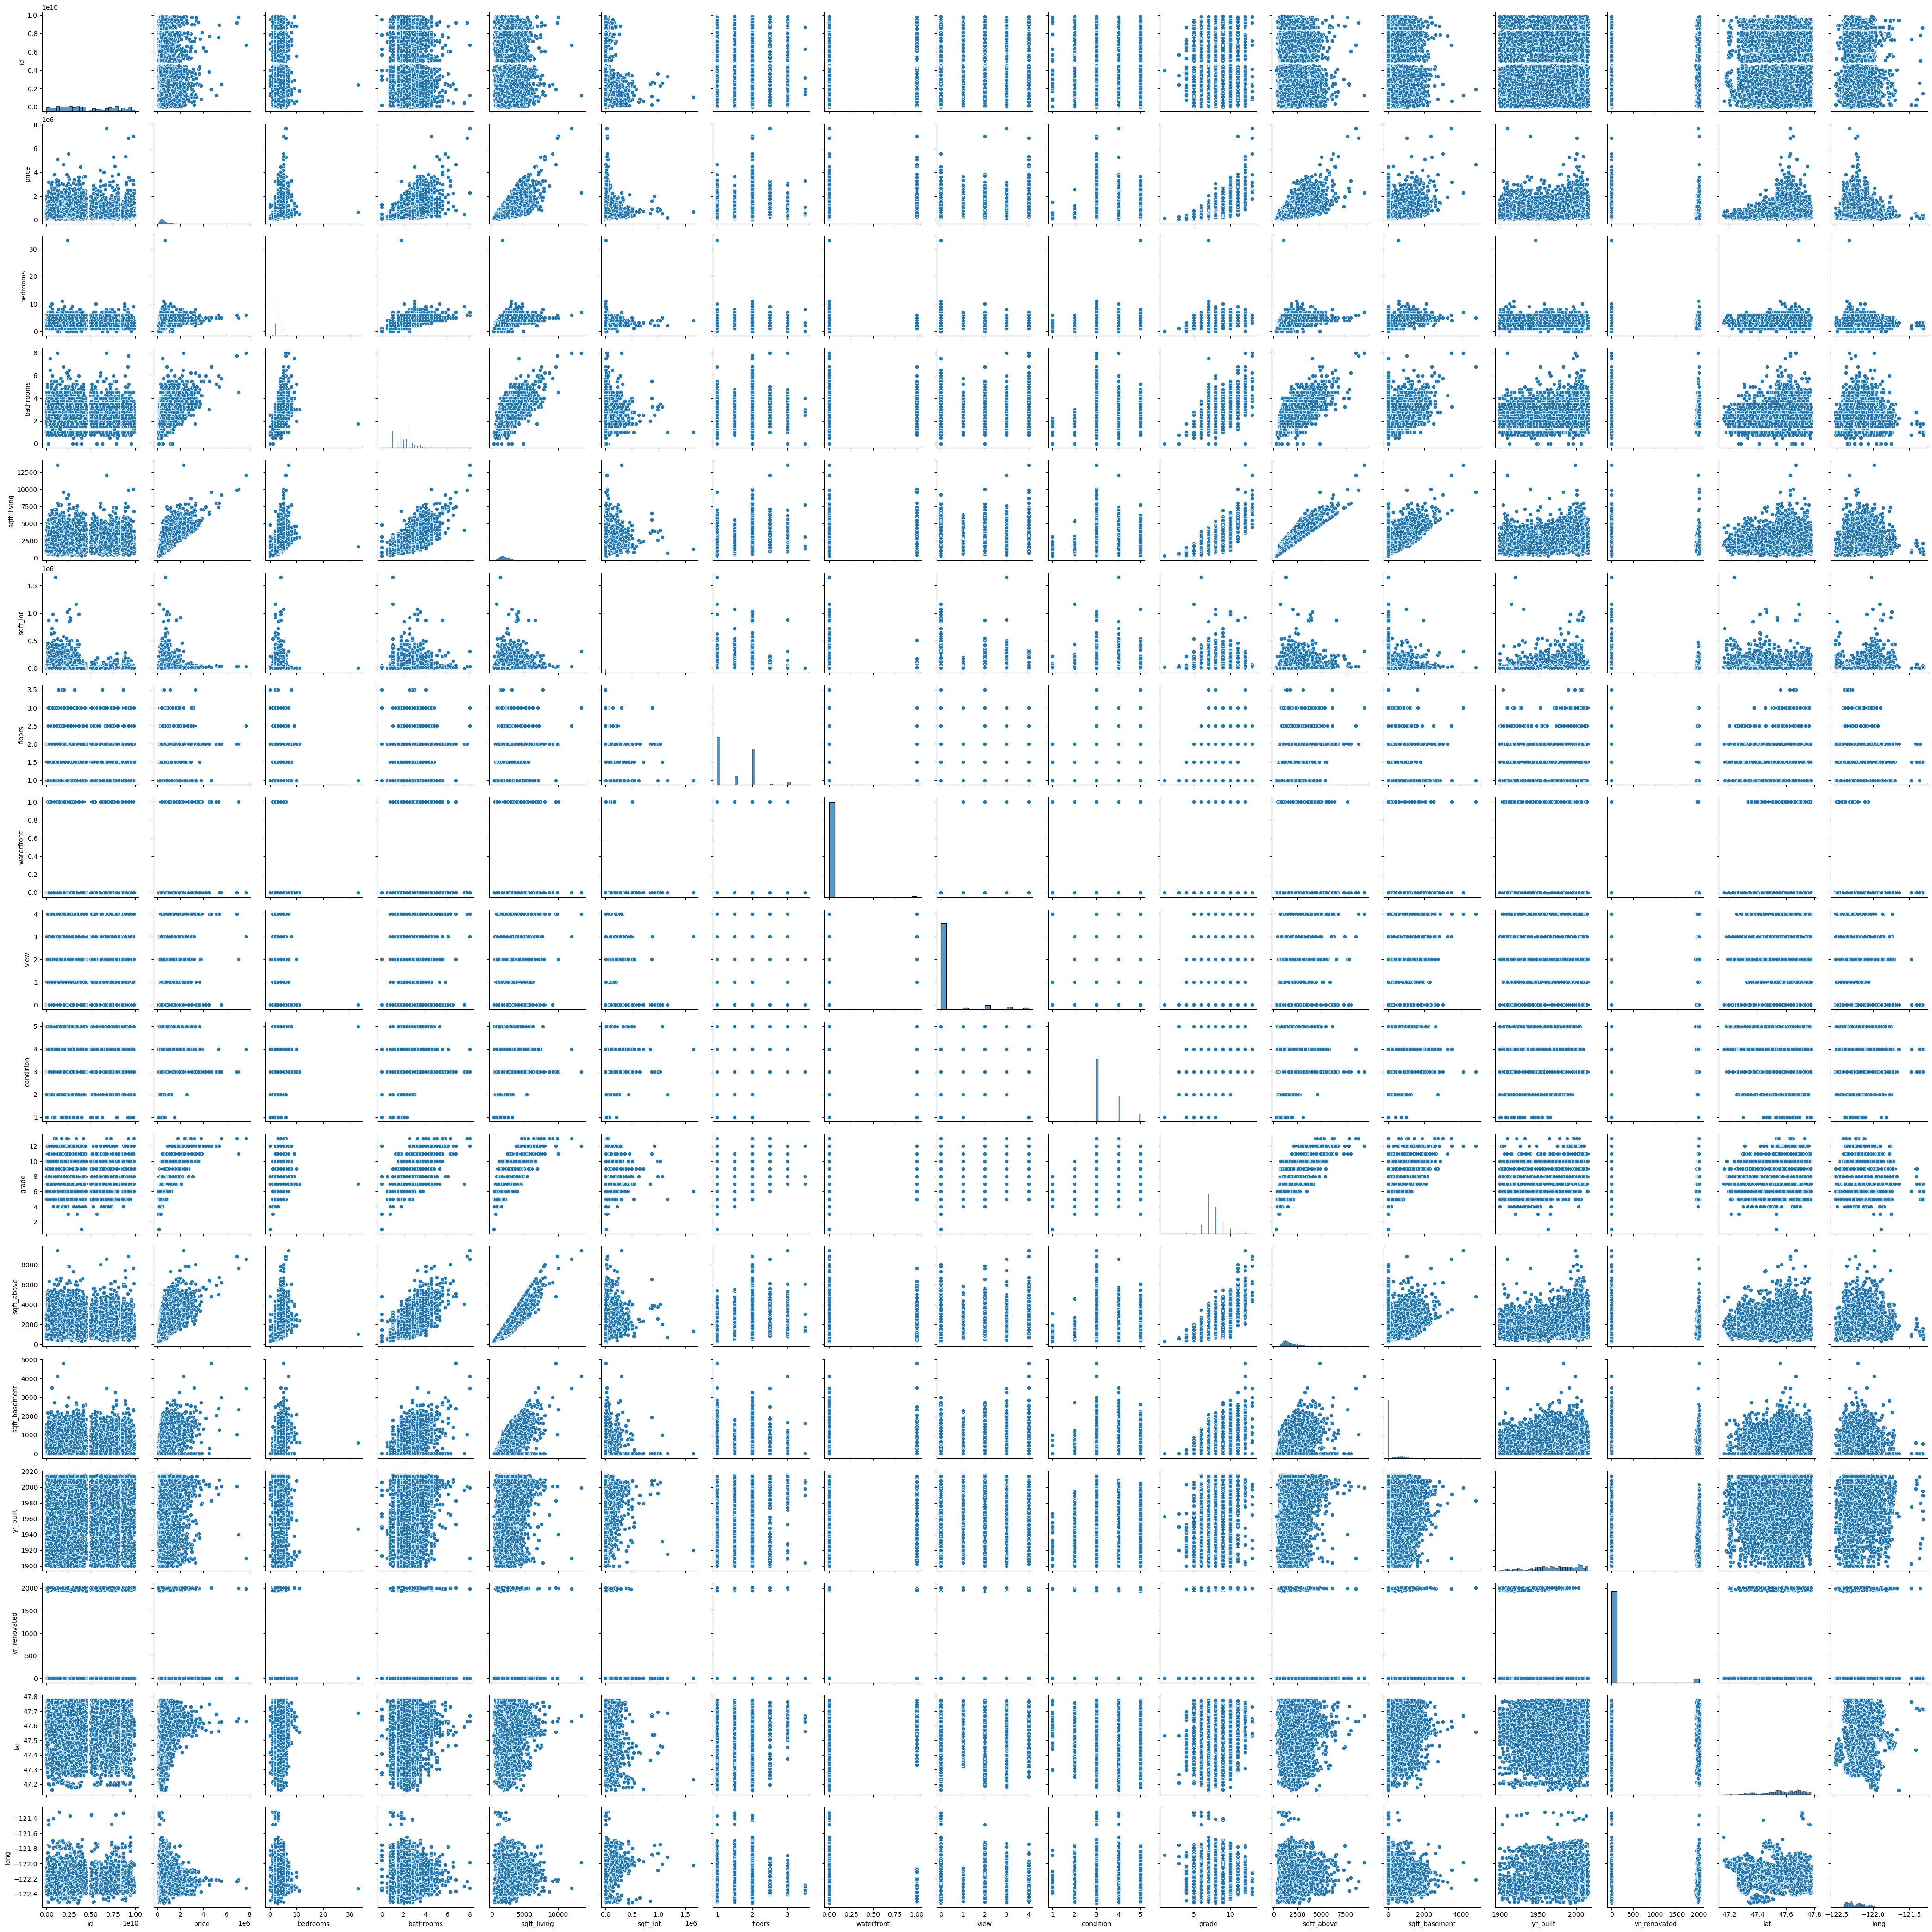

In [14]:
sns.pairplot(sales_df)

In [ ]:
sales_df.drop(columns = ["lat", "long", 'id'], inplace = True)


In [15]:
sales_df.head()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520  221900.0         3       1.00         1180      5650     1.0   
1  6414100192  538000.0         3       2.25         2570      7242     2.0   
2  5631500400  180000.0         2       1.00          770     10000     1.0   
3  2487200875  604000.0         4       3.00         1960      5000     1.0   
4  1954400510  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
1           0     0          3      7        2170            400      1951   
2           0     0          3      6         770              0      1933   
3           0     0          5      7        1050            910      1965   
4           0     0          3      8        1680              0      1987   

   yr_renovated      lat     long  
0             0  47.5112 -122.257  
1          1991  47.7210 -122.319  
2             0  47.7379 -122.233  
3             0  47.5208 -122.393  
4             0  47.6168 -122.045

In [17]:
sales_df.describe()


id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

                lat          long  
count  21613.000000  21613.000000  
mean      47.560053   -122.213896  
std        0.138564      0.140828  
min       47.155900   -122.519000  
25%       47.471000   -122.328000  
50%       47.571800   -122.230000  
75%       47.678000   -122.125000  
max       47.777600   -121.315000

C:\Users\arutherford\AppData\Local\Temp\ipykernel_37560\103706558.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_df["price"], bins = 25, axlabel = "Sales Price")


<Axes: xlabel='Sales Price', ylabel='Density'>

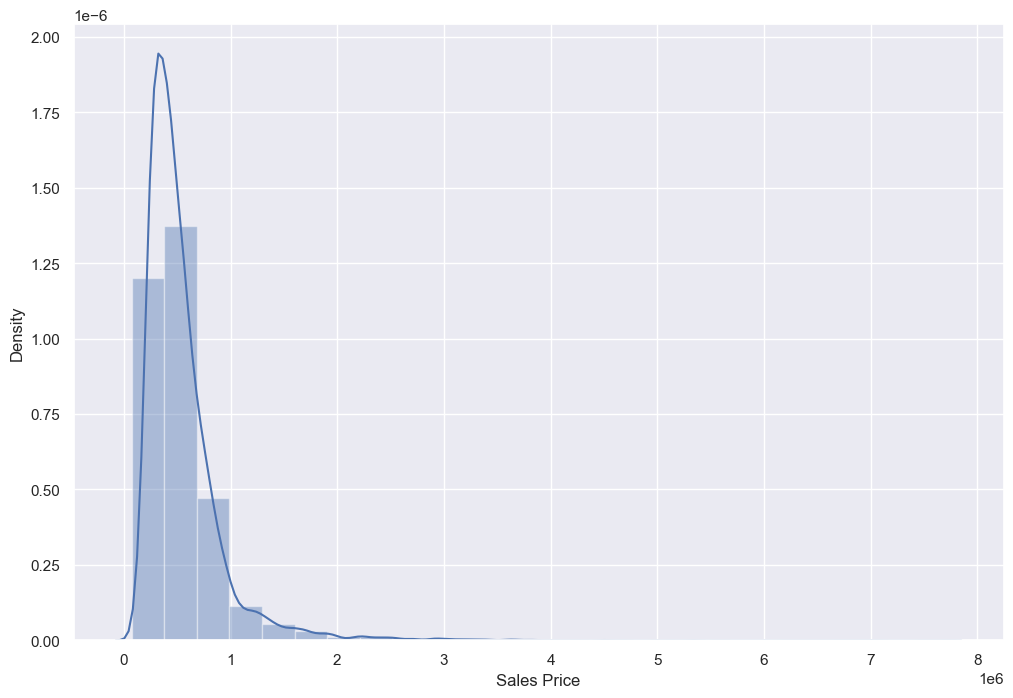

In [19]:
sns.set(rc = {"figure.figsize": (12, 8)})

sns.distplot(sales_df["price"], bins = 25, axlabel = "Sales Price")

In [ ]:
## Polynomial Features
### Multiple Features


In [ ]:
Polynomial transform is a simple way to increase the complexity of the model, but we must be mindful of overfilling.
Below, we will perform a second degree (degree=2) polynomial transformation.

# Polynomial Regression

**Define and load the predictor (X) and Target(y) variables**

In [24]:
y_col = "price"

X = sales_df.drop(y_col, axis=1)
y = sales_df[y_col]


In [21]:
print(X.shape, y.shape)

(21613, 16) (21613,)


In [22]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [23]:
X

id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      7129300520         3       1.00         1180      5650     1.0   
1      6414100192         3       2.25         2570      7242     2.0   
2      5631500400         2       1.00          770     10000     1.0   
3      2487200875         4       3.00         1960      5000     1.0   
4      1954400510         3       2.00         1680      8080     1.0   
...           ...       ...        ...          ...       ...     ...   
21608   263000018         3       2.50         1530      1131     3.0   
21609  6600060120         4       2.50         2310      5813     2.0   
21610  1523300141         2       0.75         1020      1350     2.0   
21611   291310100         3       2.50         1600      2388     2.0   
21612  1523300157         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
0               0     0          3      7        1180              0   
1               0     0          3      7        2170            400   
2               0     0          3      6         770              0   
3               0     0          5      7        1050            910   
4               0     0          3      8        1680              0   
...           ...   ...        ...    ...         ...            ...   
21608           0     0          3      8        1530              0   
21609           0     0          3      8        2310              0   
21610           0     0          3      7        1020              0   
21611           0     0          3      8        1600              0   
21612           0     0          3      7        1020              0   

       yr_built  yr_renovated      lat     long  
0          1955             0  47.5112 -122.257  
1          1951          1991  47.7210 -122.319  
2          1933             0  47.7379 -122.233  
3          1965             0  47.5208 -122.393  
4          1987             0  47.6168 -122.045  
...         ...           ...      ...      ...  
21608      2009             0  47.6993 -122.346  
21609      2014             0  47.5107 -122.362  
21610      2009             0  47.5944 -122.299  
21611      2004             0  47.5345 -122.069  
21612      2008             0  47.5941 -122.299  

[21613 rows x 16 columns]

**Create Features**

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [27]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_predict = lr.predict(X_test)

In [28]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_predict = lr.predict(X_test)

In [29]:
print("RMSE : ", np.sqrt(mean_squared_error(y_test, y_predict)))
print("R2 : ", r2_score(y_test, y_predict))

RMSE :  235206.52773142883
R2 :  0.6794797251425624


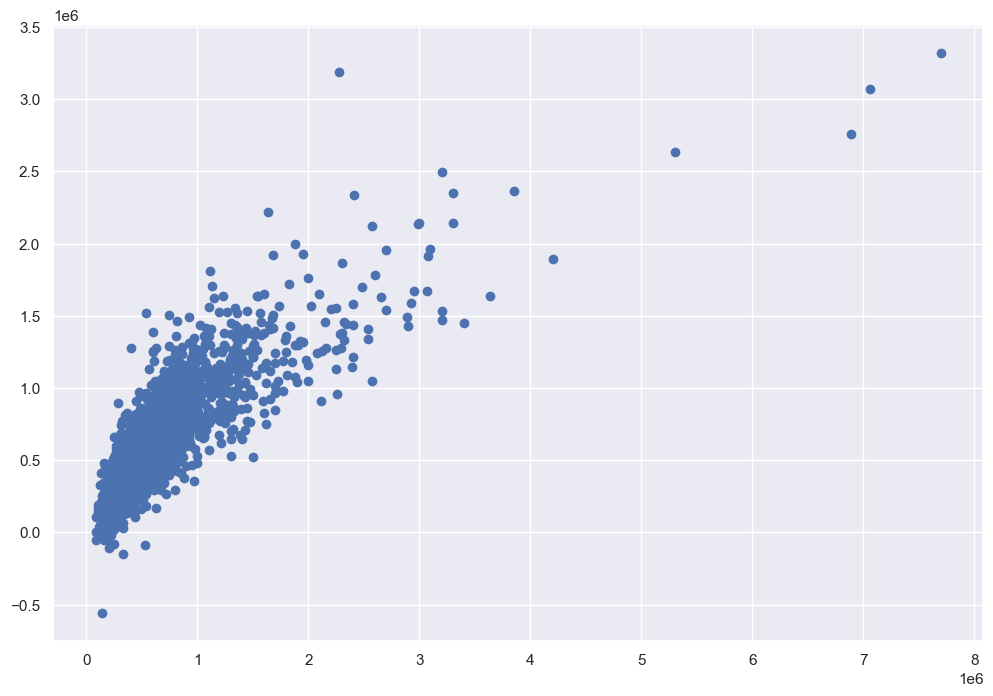

In [30]:
plt.scatter(y_test, y_predict)
plt.show()

# Polynomial features

In [33]:
poly_features = PolynomialFeatures(degree = 2)
X_train_poly = poly_features.fit_transform(X_train)
print(X_train_poly.shape)

pr = LinearRegression()
pr.fit(X_train_poly, y_train)

X_test_poly = poly_features.fit_transform(X_test)
y_predict_poly = pr.predict(X_test_poly)

(17290, 153)


In [36]:
print("RMSE : ", np.sqrt(mean_squared_error(y_test, y_predict_poly)))
print("R2 : ", r2_score(y_test, y_predict_poly))

RMSE :  260457.72665968415
R2 :  0.606964972694838


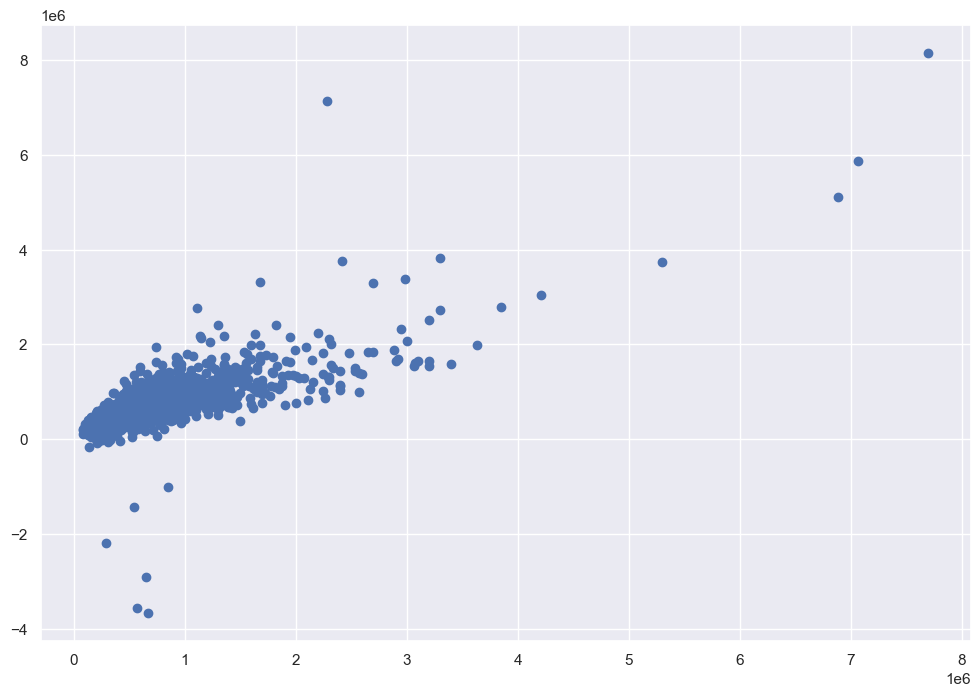

In [37]:
plt.scatter(y_test, y_predict_poly)
plt.show()